In [ ]:
# import os
# import glob
# import shutil
# import numpy as np
# from sklearn.model_selection import train_test_split
# from src.config import HOG_FEATURE_PATH, HOG_LABEL_PATH

# # ─── 1. Dynamically find the project root ─────────────────────────────────
# def find_project_root():
#     cur = os.path.abspath(os.getcwd())
#     while cur != os.path.dirname(cur):  # stop at filesystem root
#         if os.path.isdir(os.path.join(cur, "Data", "vehicle")):
#             return cur
#         cur = os.path.dirname(cur)
#     raise RuntimeError("Could not locate project root containing Data/vehicle")

# project_root  = find_project_root()
# print("Project root found at:", project_root)

# # ─── 2. Define your folders ───────────────────────────────────────────────
# RAW_IMAGE_DIR = os.path.join(project_root, "Data")          # contains 'vehicle/' and 'non-vehicle/'
# SPLIT_ROOT    = os.path.join(project_root, "processed_images", "data-split")
# SPLIT_NPY_DIR = os.path.join(project_root, "Data", "splits")

# # Create split folders if needed
# for path in (SPLIT_ROOT, SPLIT_NPY_DIR):
#     os.makedirs(path, exist_ok=True)
# for split in ("train_images", "val_images", "test_images"):
#     os.makedirs(os.path.join(SPLIT_ROOT, split), exist_ok=True)

# # ─── 3. Load HOG features & labels ───────────────────────────────────────
# X = np.load(HOG_FEATURE_PATH)      # e.g., (1500, 8100)
# y = np.load(HOG_LABEL_PATH)        # e.g., (1500,)
# N = len(X)

# # ─── 4. Gather raw filenames recursively & limit to N ────────────────────
# all_paths = glob.glob(os.path.join(RAW_IMAGE_DIR, "**", "*.*"), recursive=True)
# all_images = sorted([
#     os.path.relpath(p, RAW_IMAGE_DIR)
#     for p in all_paths
#     if p.lower().endswith((".jpg", ".jpeg", ".png"))
# ])

# if len(all_images) < N:
#     raise RuntimeError(f"❌ Found only {len(all_images)} images but need {N} feature vectors.")

# # **Limit** to exactly N filenames
# filenames = all_images[:N]
# print(f"✔️ Using first {N} images for splitting (out of {len(all_images)} available)")

# # ─── 5. Split into train/val/test (70/20/10) ──────────────────────────────
# X_rem, X_test,  y_rem, y_test,  fn_rem, fn_test  = train_test_split(
#     X, y, filenames,
#     test_size=0.10, stratify=y, random_state=42
# )
# X_train, X_val, y_train, y_val, fn_train, fn_val = train_test_split(
#     X_rem, y_rem, fn_rem,
#     test_size=0.22,        # ≈20% of total
#     stratify=y_rem,
#     random_state=42,
# )
# print(f"Splits → train: {len(X_train)}, val: {len(X_val)}, test: {len(X_test)}")

# # ─── 6. Save .npy splits ─────────────────────────────────────────────────
# np.save(os.path.join(SPLIT_NPY_DIR, "X_train.npy"),        X_train)
# np.save(os.path.join(SPLIT_NPY_DIR, "y_train.npy"),        y_train)
# np.save(os.path.join(SPLIT_NPY_DIR, "filenames_train.npy"), fn_train)
# np.save(os.path.join(SPLIT_NPY_DIR, "X_val.npy"),          X_val)
# np.save(os.path.join(SPLIT_NPY_DIR, "y_val.npy"),          y_val)
# np.save(os.path.join(SPLIT_NPY_DIR, "filenames_val.npy"),   fn_val)
# np.save(os.path.join(SPLIT_NPY_DIR, "X_test.npy"),         X_test)
# np.save(os.path.join(SPLIT_NPY_DIR, "y_test.npy"),         y_test)
# np.save(os.path.join(SPLIT_NPY_DIR, "filenames_test.npy"),  fn_test)
# print(f"✔️ Saved train/val/test `.npy` splits to {SPLIT_NPY_DIR}")

# # ─── 7. Copy raw images into each split folder ───────────────────────────
# def copy_into_split(fnames, dest_subfolder):
#     dst_dir = os.path.join(SPLIT_ROOT, dest_subfolder)
#     for rel in fnames:
#         src = os.path.join(RAW_IMAGE_DIR, rel)
#         if not os.path.exists(src):
#             print(f"⚠️ Missing image: {src}")
#             continue
#         shutil.copy(src, os.path.join(dst_dir, os.path.basename(rel)))

# copy_into_split(fn_train, "train_images")
# copy_into_split(fn_val,   "val_images")
# copy_into_split(fn_test,  "test_images")
# print("✔️ Raw images copied into:")
# print("   ", os.path.join(SPLIT_ROOT, "train_images"))
# print("   ", os.path.join(SPLIT_ROOT, "val_images"))
# print("   ", os.path.join(SPLIT_ROOT, "test_images"))

## **Setup imports & paths**

In [37]:
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_root)

import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from src.config import HOG_FEATURE_PATH, HOG_LABEL_PATH, HSV_FEATURE_PATH, HSV_LABEL_PATH

In [47]:
## **Load saved features & labels**

In [38]:
# Load HOG features
X_hog = np.load(HOG_FEATURE_PATH)
y_hog = np.load(HOG_LABEL_PATH)
print("HOG Features:", X_hog.shape, "Labels:", y_hog.shape)

HOG Features: (1500, 8612) Labels: (1500,)


In [39]:
# Load HSV features (assuming they were saved separately)
X_hsv = np.load(HSV_FEATURE_PATH)
y_hsv = np.load(HSV_LABEL_PATH)
print("HSV Features:", X_hsv.shape, "Labels:", y_hsv.shape)

HSV Features: (1590, 512) Labels: (1590,)


In [40]:
# ─── Cell 3: Split HOG features ──────────────────────────────────────────
# Split 70% train / 20% val / 10% test for HOG
X_hog_rem, X_hog_test, y_hog_rem, y_hog_test = train_test_split(
    X_hog, y_hog, test_size=0.10, stratify=y_hog, random_state=42
)
X_hog_train, X_hog_val, y_hog_train, y_hog_val = train_test_split(
    X_hog_rem, y_hog_rem, test_size=2/9, stratify=y_hog_rem, random_state=42
)

print(f"HOG Train: {len(X_hog_train)}, Val: {len(X_hog_val)}, Test: {len(X_hog_test)}")

HOG Train: 1050, Val: 300, Test: 150


In [41]:
# ─── Cell 4: Split HSV features ──────────────────────────────────────────
# Split 70% train / 20% val / 10% test for HSV
X_hsv_rem, X_hsv_test, y_hsv_rem, y_hsv_test = train_test_split(
    X_hsv, y_hsv, test_size=0.10, stratify=y_hsv, random_state=42
)
X_hsv_train, X_hsv_val, y_hsv_train, y_hsv_val = train_test_split(
    X_hsv_rem, y_hsv_rem, test_size=2/9, stratify=y_hsv_rem, random_state=42
)

print(f"HSV Train: {len(X_hsv_train)}, Val: {len(X_hsv_val)}, Test: {len(X_hsv_test)}")

HSV Train: 1113, Val: 318, Test: 159


In [42]:
# ─── Cell 2a: Down-sample HSV to exactly 1 500 samples ────────────────────
from sklearn.model_selection import train_test_split

# Downsample HSV set to match HOG (1500 samples)
X_hsv, _, y_hsv, _ = train_test_split(
    X_hsv, y_hsv,
    train_size=1500,
    stratify=y_hsv,
    random_state=42
)

print("Trimmed HSV Features:", X_hsv.shape, "Labels:", y_hsv.shape)

Trimmed HSV Features: (1500, 512) Labels: (1500,)


In [44]:
# ─── Cell 5: Split Combined features ─────────────────────────────────────
# Combine HOG and HSV features for a combined set
X_combined = np.concatenate((X_hog, X_hsv), axis=1)  # Combine along feature axis
y_combined = y_hog  # Only use one label array

print(f"Combined Features Shape: {X_combined.shape}")
print(f"Combined Labels Shape: {y_combined.shape}")

# Split 70% train / 20% val / 10% test for combined features
X_combined_rem, X_combined_test, y_combined_rem, y_combined_test = train_test_split(
    X_combined, y_combined, test_size=0.10, stratify=y_combined, random_state=42
)
X_combined_train, X_combined_val, y_combined_train, y_combined_val = train_test_split(
    X_combined_rem, y_combined_rem, test_size=2/9, stratify=y_combined_rem, random_state=42
)

print(f"Combined Train: {len(X_combined_train)}, Val: {len(X_combined_val)}, Test: {len(X_combined_test)}")

Combined Features Shape: (1500, 9124)
Combined Labels Shape: (1500,)
Combined Train: 1050, Val: 300, Test: 150


In [45]:
# ─── Cell 6: Save the splits for future use ───────────────────────────────
# Save HOG splits
np.save(os.path.join(project_root, "Data", "X_train_hog.npy"), X_hog_train)
np.save(os.path.join(project_root, "Data", "X_val_hog.npy"), X_hog_val)
np.save(os.path.join(project_root, "Data", "X_test_hog.npy"), X_hog_test)
np.save(os.path.join(project_root, "Data", "y_train_hog.npy"), y_hog_train)
np.save(os.path.join(project_root, "Data", "y_val_hog.npy"), y_hog_val)
np.save(os.path.join(project_root, "Data", "y_test_hog.npy"), y_hog_test)

# Save HSV splits
np.save(os.path.join(project_root, "Data", "X_train_hsv.npy"), X_hsv_train)
np.save(os.path.join(project_root, "Data", "X_val_hsv.npy"), X_hsv_val)
np.save(os.path.join(project_root, "Data", "X_test_hsv.npy"), X_hsv_test)
np.save(os.path.join(project_root, "Data", "y_train_hsv.npy"), y_hsv_train)
np.save(os.path.join(project_root, "Data", "y_val_hsv.npy"), y_hsv_val)
np.save(os.path.join(project_root, "Data", "y_test_hsv.npy"), y_hsv_test)

# Save combined splits
np.save(os.path.join(project_root, "Data", "X_train_combined.npy"), X_combined_train)
np.save(os.path.join(project_root, "Data", "X_val_combined.npy"), X_combined_val)
np.save(os.path.join(project_root, "Data", "X_test_combined.npy"), X_combined_test)
np.save(os.path.join(project_root, "Data", "y_train_combined.npy"), y_combined_train)
np.save(os.path.join(project_root, "Data", "y_val_combined.npy"), y_combined_val)
np.save(os.path.join(project_root, "Data", "y_test_combined.npy"), y_combined_test)

**Feature Exploration**

(-0.5, 127.5, 127.5, -0.5)

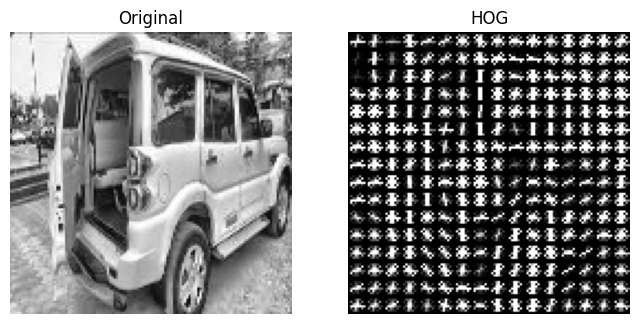

In [46]:
# ─── Cell 7: (Optional) Visualize HOG on a Sample Image ──────────────────
sample_path = os.path.join(project_root, "processed_images", "cars_0.jpg")
img = plt.imread(sample_path)
gray = img if img.ndim==2 else plt.imread(sample_path).mean(axis=2)

# Extract and visualize HOG
fd, hog_img = hog(
    gray, orientations=9, pixels_per_cell=(8,8),
    cells_per_block=(2,2), visualize=True, block_norm='L2-Hys'
)
hog_rescaled = exposure.rescale_intensity(hog_img, in_range=(0,10))

# Plot original vs. HOG image
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray');   plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(hog_rescaled, cmap='gray'); plt.title("HOG"); plt.axis('off')